### Les Miserables
Les Misérables is an 1862 historical novel by French writer Victor Hugo. It is a long, detailed novel that primarily deals with the unjust ways that society treats the poor members of the lower classes. The novel was partially inspired by Hugo's own life in France, including his experiences during the June Rebellion of 1832.

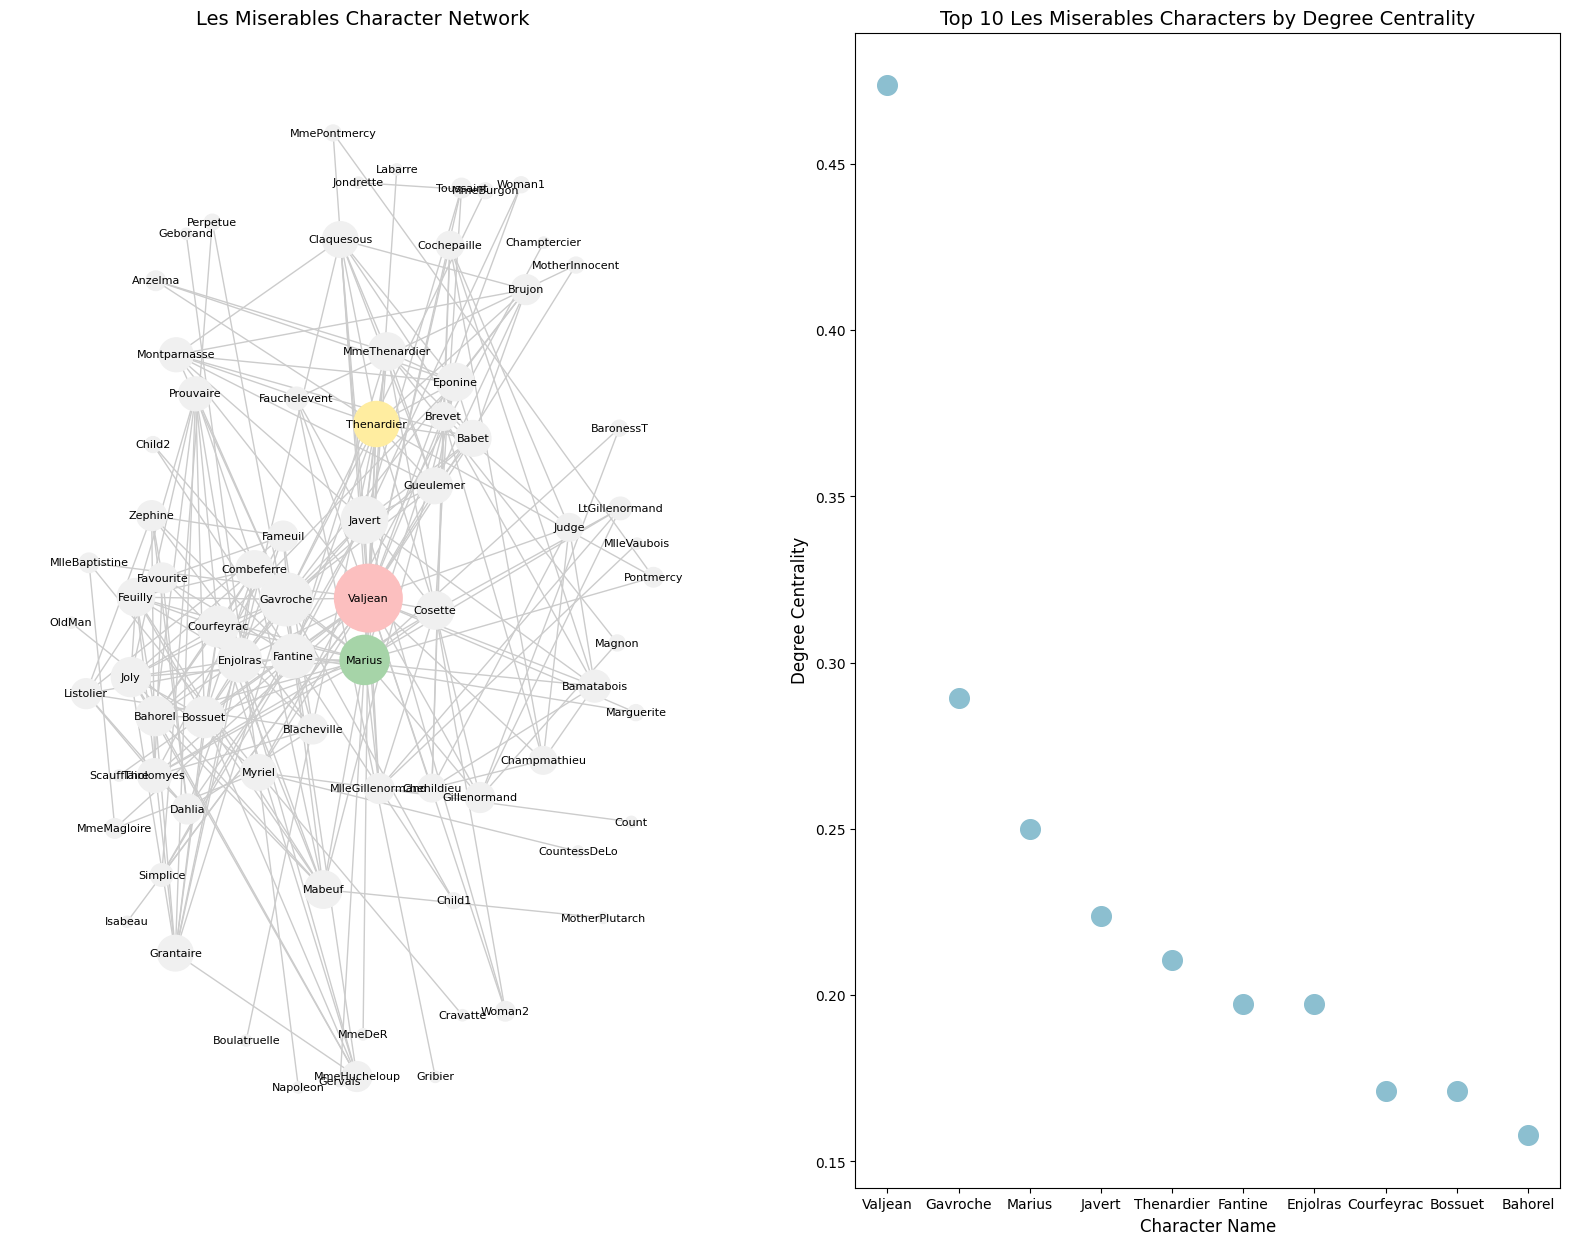

In [3]:
# Import the necessary libraries
import networkx as nx
import matplotlib.pyplot as plt

# Load the Les Miserables graph
G = nx.les_miserables_graph()

# Create a dictionary of labels for each node
labels = {}
for node in G.nodes:
    labels[node] = node.split()[0]  # use only the first name of the character as the label

# Create a dictionary of colors for each group of characters
groups = {'Bishop': '#8cbfd0', 'Marius': '#a6d4a8', 'Valjean': '#fcbfbf', 'Thenardier': '#ffeda0', 'Others': '#f0f0f0'}
colors = {}
for node in G.nodes:
    if labels[node] in groups:
        colors[node] = groups[labels[node]]
    else:
        colors[node] = groups['Others']

# Set the positions of the nodes using the spring layout algorithm
pos = nx.spring_layout(G, k=1.5)

# Calculate the degree centrality of each node
degree_centrality = nx.degree_centrality(G)

# Create a list of the top 10 nodes with the highest degree centrality
top_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:10]

# Create a list of x-coordinates and y-coordinates for the top nodes
x = [degree_centrality[node] for node in top_nodes]
y = [pos[node][1] for node in top_nodes]

# Set the node size proportional to the degree centrality
node_size = [5000 * degree_centrality[node] for node in G.nodes]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))

# Draw the graph with node labels and colors on the first subplot
nx.draw(G, pos, with_labels=True, labels=labels, ax=ax1, node_color=[colors[node] for node in G.nodes], edge_color='#cccccc', node_size=node_size, font_size=8)
# Draw a red circle around the top nodes on the first subplot
# ax1.scatter(x, y, s=400, facecolors='none', edgecolors='r')
# Set the title of the first subplot
ax1.set_title('Les Miserables Character Network', fontsize=14)

top_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_node_names = [node[0] for node in top_nodes]
top_node_centralities = [node[1] for node in top_nodes]

# Create a scatter plot of the degree centrality distribution on the second subplot
ax2.scatter(top_node_names, top_node_centralities, color='#8cbfd0', s=200)

# Set the title and axis labels of the second subplot
ax2.set_title('Top 10 Les Miserables Characters by Degree Centrality', fontsize=14)
ax2.set_xlabel('Character Name', fontsize=12)
ax2.set_ylabel('Degree Centrality', fontsize=12)

# Show the plot
plt.show()
